# Diabetes Prediction Using Classification Algorithms

-----
#### What is Diabetes??? 


  Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

  Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.


#### Step by step procedure of this Project is listed below:

1) Data Collection

2) Exploratory Data Analysis and Data Preprocessing(Data Cleaning and Treating Missing Values)

3) Splitting dataset into Training and Testing Data

4) Prediction using diffferent Classification Algorithms
______

In [1]:
#Importing required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
import warnings 
warnings.filterwarnings('ignore')

____
## 1) Data Collection:
_____

In [3]:
#Loading Dataset as dataframe

data=pd.read_csv(r"C:\Users\Yash Bhatnagar\Desktop\Study\Projects\Diabetes\diabetes.csv")

In [4]:
#Displaying the first 10 rows

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


____
## 2) Exploratory Data Analysis and Data Preprocessing(Data Cleaning and Treating Missing Values) :
____

In [5]:
#Getting information about our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Knowing the datatypes of the columns

data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
#Describe function for the summary or stats of the data 

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Columns in our dataset 

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
#checking for the null values 

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### “Outcome” is the feature we are going to predict, 0 means No diabetes, 1 means diabetes
____

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0DAA85EF0>,
      dtype=object)

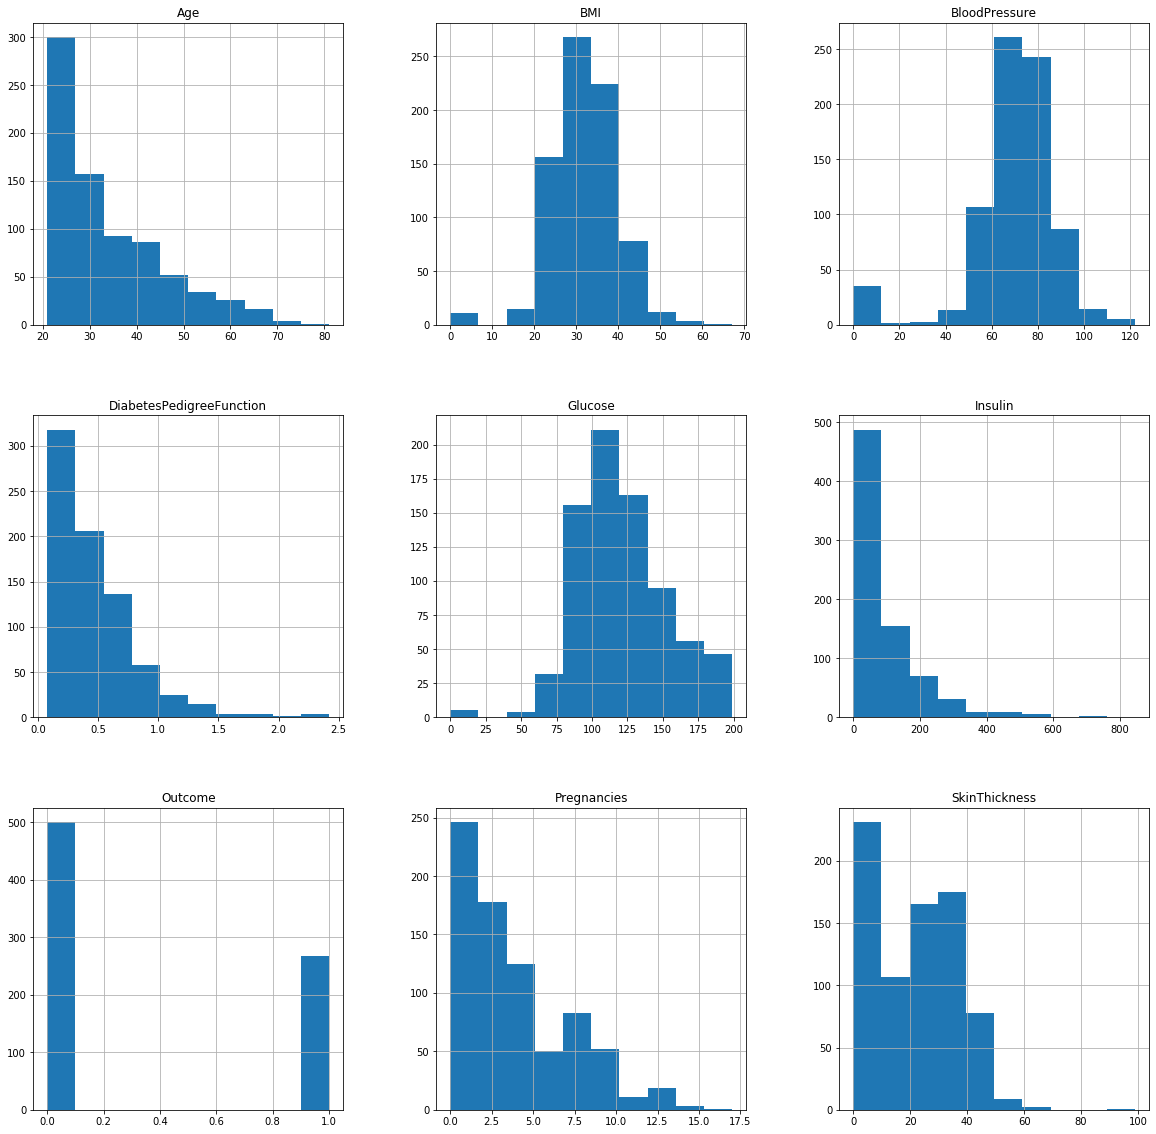

In [10]:
#analysing the distribution of the data in respective columns

p = data.hist(figsize = (20,20))
p

In [11]:
#making a copy of dataframe for the boxplot analysis by eleminating unuseful columns

datacopy=data.drop(columns=['DiabetesPedigreeFunction','Age','Outcome'])

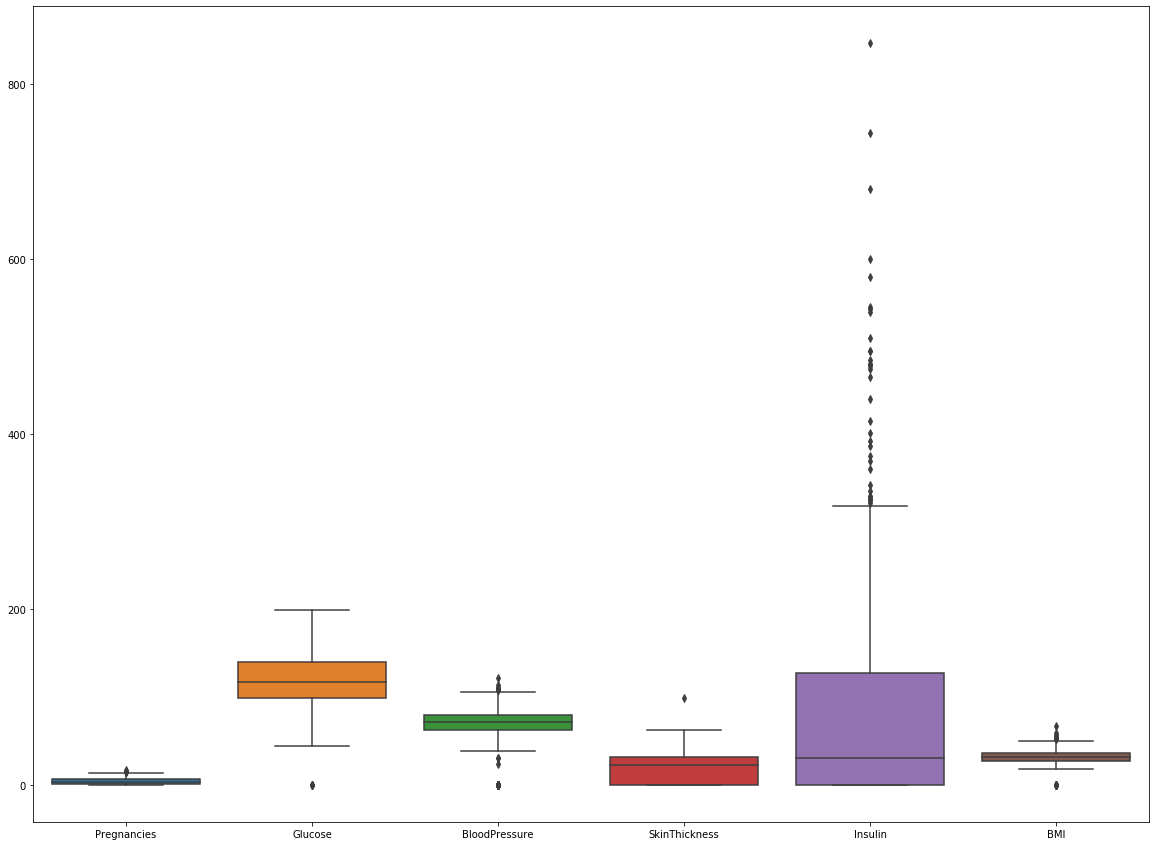

In [12]:
#BoxPlot for detecting the distribution and outliers in the columns 

plt.figure(figsize=(20,15))
sns.boxplot(data=datacopy)

____
#### The Question from this summary
Can minimum value of below listed columns be zero(0)?
On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

  1. Glucose
  2. BloodPressure
  3. SkinThickness
  4. Insulin
  5. BMI
  
It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
____

In [13]:
#Replacing zeros in the above listed columns with Nan values for better execution

data['Glucose'].replace(to_replace=0,value=np.nan,inplace=True)
data['BloodPressure'].replace(to_replace=0,value=np.nan,inplace=True)
data['SkinThickness'].replace(to_replace=0,value=np.nan,inplace=True)
data['Insulin'].replace(to_replace=0,value=np.nan,inplace=True)
data['BMI'].replace(to_replace=0,value=np.nan,inplace=True)

In [14]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
#Replacing Null values with the Mean or Median of the column

data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [16]:
#Describe function for the summary or stats of the data 

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0DB3BA470>,
      dtype=object)

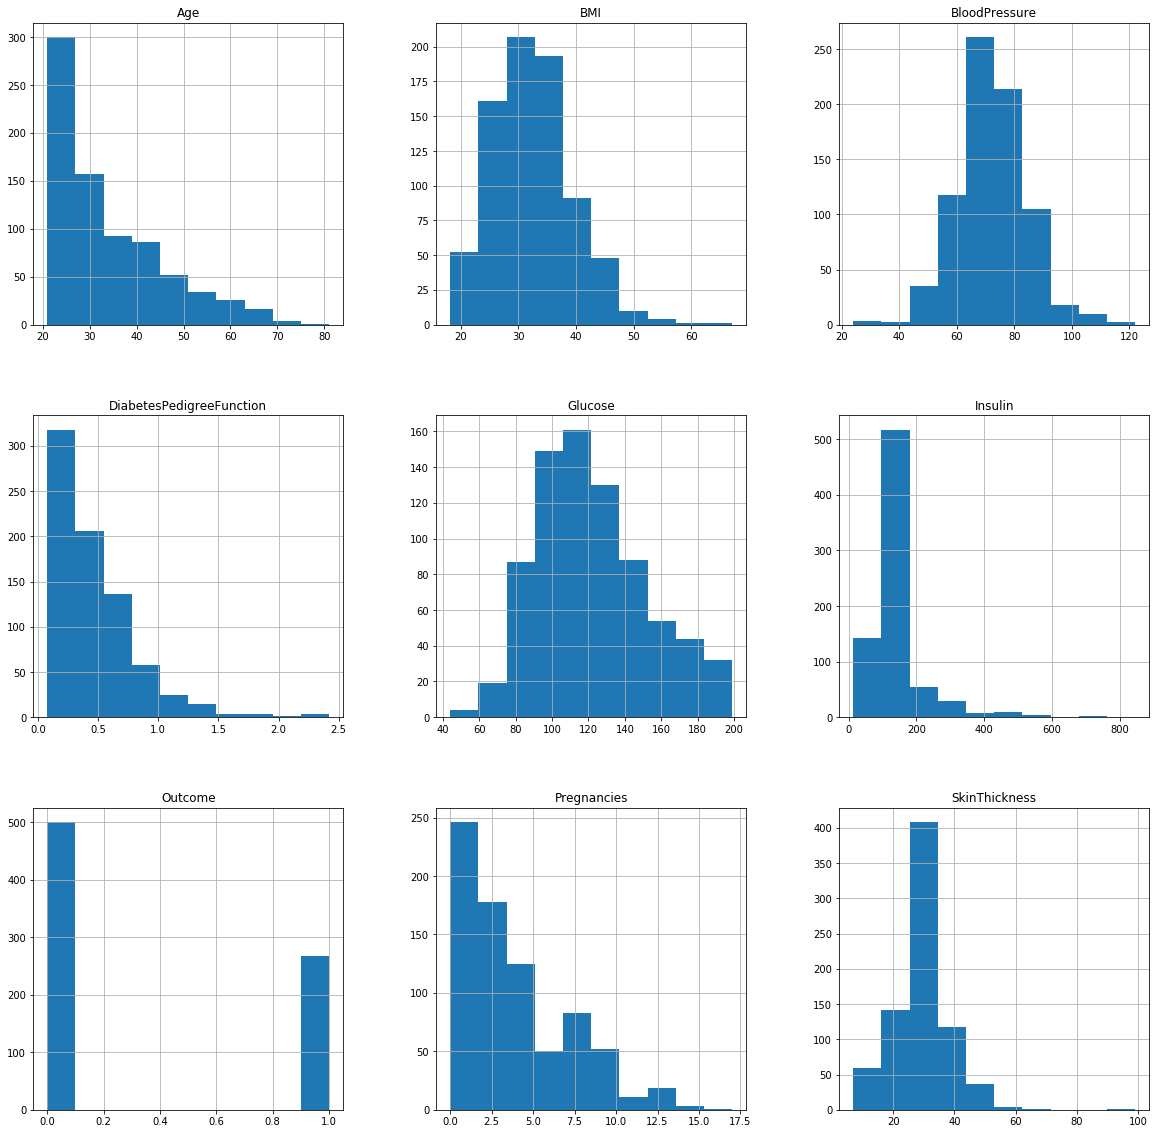

In [17]:
#analysing the distribution of the data in respective columns after Replacing null values

q = data.hist(figsize = (20,20))
q

In [18]:
#Making a Final Dataset after removing the outliers in Insulin Column as per the Boxplot results

datafinal=data[data['Insulin']<300].reset_index(drop=True)
datafinal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
#Describe function for the summary or stats of the data 

datafinal.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,3.835616,119.773197,72.426276,28.943836,125.023288,32.317123,0.466810,33.161644,0.336986
std,3.385249,29.539276,12.082824,8.693587,45.286568,6.879910,0.321849,11.698952,0.473004
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,116.750000,27.400000,0.243250,24.000000,0.000000
50%,3.000000,115.000000,72.405184,29.000000,125.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,125.000000,36.375000,0.613750,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,293.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
#Total Rows in the Dataset
n=len(datafinal.index)
n

730

### “Outcome” is the feature we are going to predict, 0 means No diabetes, 1 means diabetes

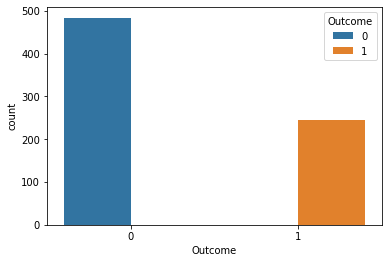

In [21]:
#Count of the outcomes

sns.countplot(datafinal['Outcome'],data=datafinal,hue=datafinal["Outcome"])

In [22]:
#Count of both the outcomes

datafinal['Outcome'].value_counts()

0    484
1    246
Name: Outcome, dtype: int64

In [23]:
#Finding Correlation between the columns 

datafinal.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.141288,0.211341,0.081021,0.069817,0.027715,-0.033806,0.538058,0.219685
Glucose,0.141288,1.000000,0.245434,0.171818,0.373789,0.222439,0.114086,0.278532,0.489328
BloodPressure,0.211341,0.245434,1.000000,0.189712,0.108234,0.283954,-0.009341,0.331584,0.177760
SkinThickness,0.081021,0.171818,0.189712,1.000000,0.160009,0.538075,0.085381,0.131578,0.202759
Insulin,0.069817,0.373789,0.108234,0.160009,1.000000,0.196624,0.099971,0.136265,0.226456
BMI,0.027715,0.222439,0.283954,0.538075,0.196624,1.000000,0.155096,0.039314,0.320945
DiabetesPedigreeFunction,-0.033806,0.114086,-0.009341,0.085381,0.099971,0.155096,1.000000,0.045287,0.189447
Age,0.538058,0.278532,0.331584,0.131578,0.136265,0.039314,0.045287,1.000000,0.227374
Outcome,0.219685,0.489328,0.177760,0.202759,0.226456,0.320945,0.189447,0.227374,1.000000


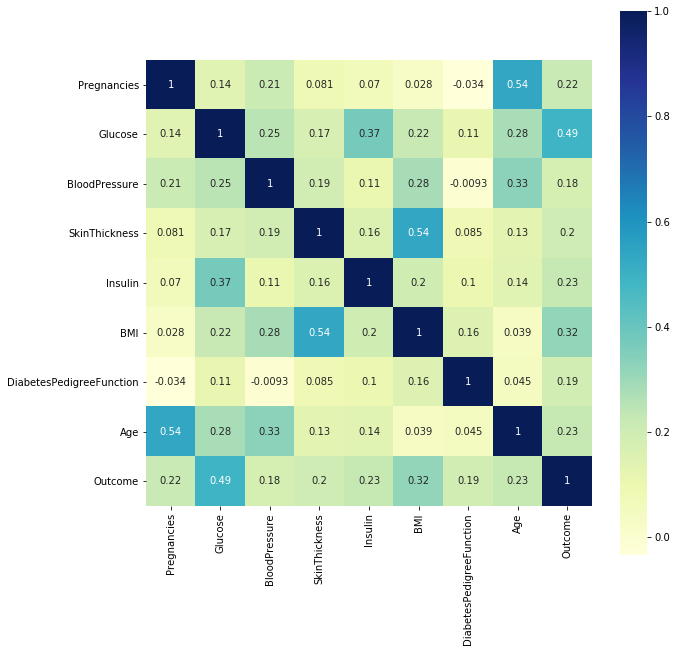

In [24]:
#HeatMap for better understanding of correraltion

plt.figure(figsize=(10,10))
sns.heatmap(datafinal.corr(),annot=True,square=True,cmap="YlGnBu")

In [25]:
#Correlaton of Independent variables with Dependent variables

datafinal.corrwith(datafinal['Outcome'])

Pregnancies                 0.219685
Glucose                     0.489328
BloodPressure               0.177760
SkinThickness               0.202759
Insulin                     0.226456
BMI                         0.320945
DiabetesPedigreeFunction    0.189447
Age                         0.227374
Outcome                     1.000000
dtype: float64

In [26]:
X = datafinal.iloc[:, :-1].values # Independent Variables
y = datafinal.iloc[:, 8].values   # Dependent Variables

In [27]:
# Splitting the dataset into Training Set and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [28]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

____
## 3) Prediction using diffferent Classification Algorithms
_____

____
### 1) Logistic Regression:
 ____

In [29]:
#LogisticRegression 

cval=[0.01,0.1,1,10,100]
Caccuracy=[]
from sklearn.linear_model import LogisticRegression
for c in cval:
    clf=LogisticRegression(C=c)
    clf.fit(X_train,y_train)
    
    #predicting Outcome
    y_pred=clf.predict(X_test) 
    
    #Calculating the score or accuracy of our model
    score_=clf.score(X_test,y_test)*100
    Caccuracy.append(score_)
    print("Accuracy: ","{:.2f}".format(score_),"%")
    
print("    ")
print("Best Accuracy: ","{:.2f}".format(max(Caccuracy)),"%")
best=Caccuracy.index(max(Caccuracy))

#Cvalue which gives the best acccuracy is:

bestC=cval[best]
print("Value of C for Best Accuracy: ",bestC)

Accuracy:  74.43 %
Accuracy:  73.97 %
Accuracy:  74.43 %
Accuracy:  73.97 %
Accuracy:  73.97 %
    
Best Accuracy:  74.43 %
Value of C for Best Accuracy:  0.01


In [30]:
#Calculating the score or accuracy of our model

clf=LogisticRegression(C=bestC)
clf.fit(X_train,y_train)
    
#predicting Outcome

y_pred=clf.predict(X_test)
score_=clf.score(X_test,y_test)*100
print("Accuracy=", "{:.2f}".format(score_),"%")

Accuracy= 74.43 %


In [31]:
#Confusion Matrix for viewing the correct and incorrect predictions of outcome made by the Model

matrix=confusion_matrix(y_test, y_pred)
matrix

array([[125,  17],
       [ 39,  38]], dtype=int64)

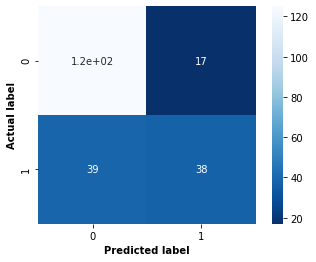

In [32]:
#HeatMap for the Confusion Matrix

sns.heatmap(matrix,annot=True,square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',weight='bold');
plt.xlabel('Predicted label',weight='bold');

In [33]:
#Summary of Logistic Regression

print("Summary of Logistic Regression:")
col={"Stats":["{:.2f}".format(score_),"{:.2f}".format(bestC)]}
lr=pd.DataFrame(col,index=["Accuracy %",'Best C Value'])
lr

Summary of Logistic Regression:


,Stats
Accuracy %,74.43
Best C Value,0.01


____
### 2) K Nearest Neighbours(KNN) :
____

In [34]:
#K Nearest Neighbour

import math
from sklearn.neighbors import KNeighborsClassifier
KNNaccuracy=[]
for k in range(1,50): 
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred2=neigh.predict(X_test)
    score1=neigh.score(X_test,y_test)*100
    print("Accuracy=", "{:.2f}".format(score1),"%")
    KNNaccuracy.append(score1)
    
#score or accuracy of our model
print("        ")
print("Max Accuracy:","{:.2f}".format(max(KNNaccuracy)),"%")
print("K Value for max Accuracy:",KNNaccuracy.index(max(KNNaccuracy))+1)

bestK=KNNaccuracy.index(max(KNNaccuracy))+1

Accuracy= 68.95 %
Accuracy= 67.58 %
Accuracy= 68.95 %
Accuracy= 70.32 %
Accuracy= 72.15 %
Accuracy= 72.15 %
Accuracy= 73.06 %
Accuracy= 71.23 %
Accuracy= 70.78 %
Accuracy= 70.32 %
Accuracy= 71.23 %
Accuracy= 71.69 %
Accuracy= 73.97 %
Accuracy= 73.06 %
Accuracy= 73.97 %
Accuracy= 73.97 %
Accuracy= 72.15 %
Accuracy= 73.06 %
Accuracy= 74.43 %
Accuracy= 74.89 %
Accuracy= 76.26 %
Accuracy= 73.97 %
Accuracy= 72.60 %
Accuracy= 72.60 %
Accuracy= 73.97 %
Accuracy= 72.15 %
Accuracy= 72.60 %
Accuracy= 72.15 %
Accuracy= 72.15 %
Accuracy= 70.78 %
Accuracy= 72.60 %
Accuracy= 73.06 %
Accuracy= 73.52 %
Accuracy= 72.15 %
Accuracy= 73.52 %
Accuracy= 72.60 %
Accuracy= 73.06 %
Accuracy= 70.78 %
Accuracy= 73.06 %
Accuracy= 71.69 %
Accuracy= 71.69 %
Accuracy= 72.60 %
Accuracy= 72.60 %
Accuracy= 72.15 %
Accuracy= 73.97 %
Accuracy= 73.06 %
Accuracy= 74.43 %
Accuracy= 73.97 %
Accuracy= 73.52 %
        
Max Accuracy: 76.26 %
K Value for max Accuracy: 21


Text(0, 0.5, 'Accuracy for K value')

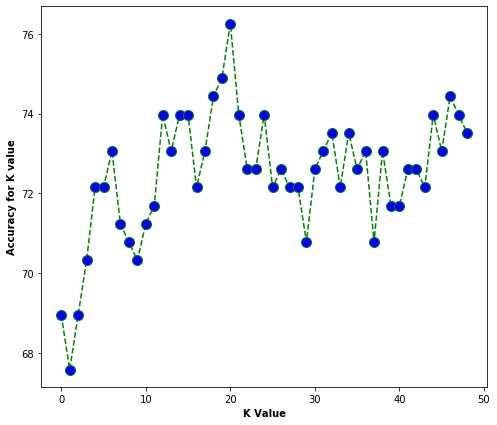

In [35]:
#Plot showing the Accuracy for the respective K Values

plt.figure(figsize=(8,7))
plt.plot(KNNaccuracy,color = 'green',linestyle='dashed',marker='o',markerfacecolor='blue', markersize=10)
plt.xlabel("K Value",weight='bold')
plt.ylabel("Accuracy for K value",weight="bold")

In [36]:
neigh = KNeighborsClassifier(n_neighbors=bestK)
neigh.fit(X_train, y_train)
y_pred2=neigh.predict(X_test)
score=neigh.score(X_test,y_test)*100
print("Accuracy=", "{:.2f}".format(score),"%")
matrix1=confusion_matrix(y_test, y_pred2)
matrix1

Accuracy= 76.26 %


array([[129,  13],
       [ 39,  38]], dtype=int64)

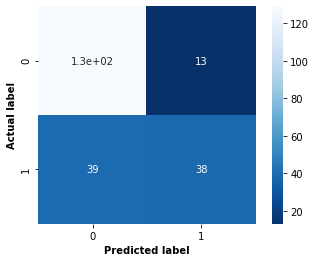

In [37]:
sns.heatmap(matrix1,annot=True,square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',weight='bold');
plt.xlabel('Predicted label',weight='bold');

In [38]:
#Summary of K Nearest Neighbour

print("Summary of K Nearest Neighbour:")
col={"Stats":["{:.2f}".format(score),"{:.0f}".format(bestK)]}
knn=pd.DataFrame(col,index=["Accuracy %","Best K Value"])
knn

Summary of K Nearest Neighbour:


,Stats
Accuracy %,76.26
Best K Value,21


______
### 3) Support Vector Machine (SVM):
_____

In [39]:
#Support Vector Machine(SVM)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',
                 random_state = 0)
classifier.fit(X_train, y_train)

#predict test set result
y_pred3 = classifier.predict(X_test)

In [40]:
#Accuracy Check

score2=classifier.score(X_test,y_test)*100
print("Accuracy=", "{:.2f}".format(score2),"%")

Accuracy= 73.52 %


In [41]:
#Confusion Matrix for viewing the correct and incorrect predictions of outcome made by the Model

matrix2= confusion_matrix(y_test, y_pred3)
matrix2

array([[126,  16],
       [ 42,  35]], dtype=int64)

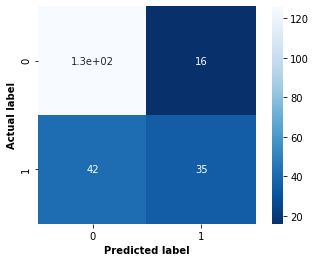

In [42]:
#HeatMap for the Confusion Matrix

sns.heatmap(matrix2,annot=True,square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',weight='bold');
plt.xlabel('Predicted label',weight='bold');

In [43]:
#Summary of SVM

print("Summary of Support Vector Machine(SVM) :")
col={"Stats":["{:.2f}".format(score2)]}
svm=pd.DataFrame(col,index=["Accuracy %"])
svm

Summary of Support Vector Machine(SVM) :


,Stats
Accuracy %,73.52


______
### 4) Decision Tree:
____

In [44]:
#Decision Tree(Default M Value result)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
score=tree.score(X_test, y_test)*100
print("Default Max Depth Accuracy on test set: ","{:.2f}".format(score),"%")

Default Max Depth Accuracy on test set:  68.95 %


In [45]:
#Finding best Max Depth Value for best accuracy

Treeaccuracy=[]
from sklearn.tree import DecisionTreeClassifier
for m in range(1,20):
    tree = DecisionTreeClassifier(max_depth=m, random_state=0)
    tree.fit(X_train, y_train)
    
    #Prediction
    y_pred4=tree.predict(X_test)
    
    #Accuracy check
    score=tree.score(X_test, y_test)*100
    
    print("Accuracy: ","{:.2f}".format(score),"%")
    Treeaccuracy.append(score)
    
    
print("      ")
print("Best Accuracy is: ","{:.2f}".format(max(Treeaccuracy)),"%")
bestm=Treeaccuracy.index(max(Treeaccuracy))+1
print("Max depth for best accuracy is: ",bestm)

Accuracy:  69.41 %
Accuracy:  71.23 %
Accuracy:  71.23 %
Accuracy:  69.86 %
Accuracy:  69.86 %
Accuracy:  73.06 %
Accuracy:  72.15 %
Accuracy:  68.04 %
Accuracy:  70.32 %
Accuracy:  68.95 %
Accuracy:  70.32 %
Accuracy:  69.86 %
Accuracy:  69.41 %
Accuracy:  68.95 %
Accuracy:  68.95 %
Accuracy:  68.95 %
Accuracy:  68.95 %
Accuracy:  68.95 %
Accuracy:  68.95 %
      
Best Accuracy is:  73.06 %
Max depth for best accuracy is:  6


Text(0, 0.5, 'Accuracy for M value')

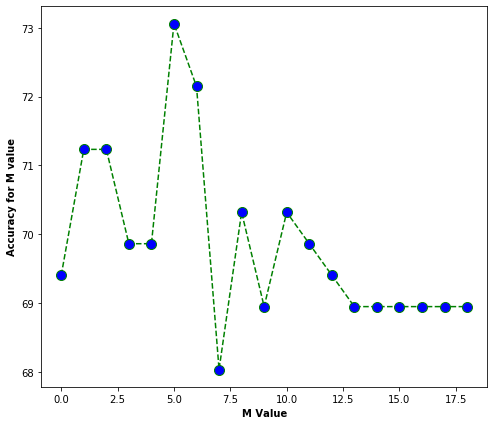

In [46]:
#Plot showing the Accuracy for the respective M(Max Depth) Values

plt.figure(figsize=(8,7))
plt.plot(Treeaccuracy,color = 'green',linestyle='dashed',marker='o',markerfacecolor='blue', markersize=10)
plt.xlabel("M Value",weight='bold')
plt.ylabel("Accuracy for M value",weight="bold")

Text(0, 0.5, 'Feature')

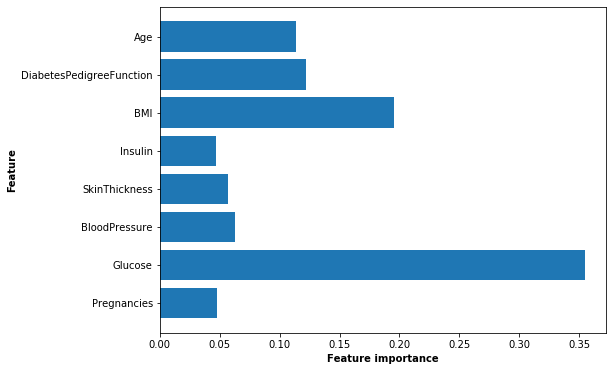

In [47]:
#Importance of the features in our dataset for Decision Tree

plt.figure(figsize=(8,6))
n=8
plt.barh(range(n), tree.feature_importances_)
plt.yticks(np.arange(n), datafinal.columns) 
plt.xlabel("Feature importance",weight="bold")
plt.ylabel("Feature",weight="bold")

In [48]:
#Confusion Matrix for viewing the correct and incorrect predictions of outcome made by the Model

matrix3= confusion_matrix(y_test, y_pred4)
matrix3

array([[112,  30],
       [ 38,  39]], dtype=int64)

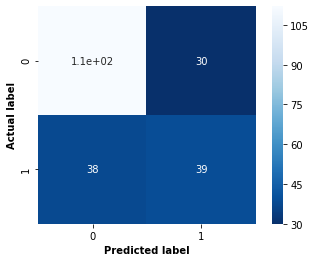

In [49]:
#HeatMap for the Confusion Matrix

sns.heatmap(matrix3,annot=True,square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',weight='bold');
plt.xlabel('Predicted label',weight='bold');

In [50]:
#Summary of Decision Tree

print("Summary of Decision Tree:")
col={"Stats":["{:.2f}".format(max(Treeaccuracy)),"{:.0f}".format(bestm)]}
dt=pd.DataFrame(col,index=["Accuracy %","Best M Value"])
dt

Summary of Decision Tree:


,Stats
Accuracy %,73.06
Best M Value,6


_______

## Finally lets summarize all the algorithms and find the best one:

_______

In [51]:
#summarize all the algorithms and find the best one

print("summarize all the algorithms and find the best one :")
col={"Accuracy":["{:.2f}".format(score_),"{:.2f}".format(score),"{:.2f}".format(score2),"{:.2f}".format(max(Treeaccuracy))]}
dt=pd.DataFrame(col,index=["Logistic Regression","K Nearest Neighbour","Support Vector Machine","Decision Tree"])
dt

summarize all the algorithms and find the best one :


,Accuracy
Logistic Regression,74.43
K Nearest Neighbour,68.95
Support Vector Machine,73.52
Decision Tree,73.06


______

#### ->Thus it is clear that *K Nearest Neighbour* gives the highest accuracy when compared to
#### Logistic Regression,
#### Support Vector Machine and
#### Decision Tree
____

#### ->So K Nearest Neighbour is the best suited model for this Diabetes Dataset.
________

___
#### Thank You!!
___